In [15]:
from sklearn.datasets import load_diabetes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
dataset = load_diabetes()

In [3]:
dataset

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [6]:
print(dataset['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [8]:
df = pd.DataFrame(data=dataset['data'], columns=dataset['feature_names'])

In [9]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [10]:
X=df
y=dataset['target']

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [12]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()

In [13]:
correlation = X_train.corr()

<Axes: >

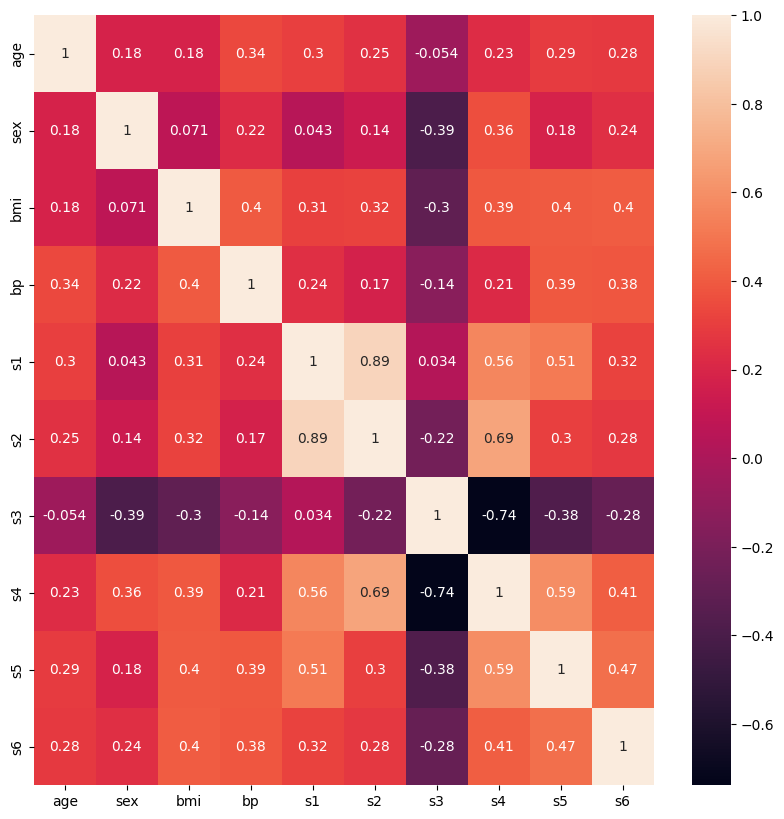

In [19]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, annot=True)

In [20]:
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [22]:
from sklearn.metrics import r2_score

predictions = model.predict(X_train)
print(r2_score(y_train, predictions))

1.0


In [23]:
param = {
    'criterion' : ['squared_error', 'friedman_mse', 'absolute_error'],
    'splitter' : ['best', 'random'],
    'max_depth' : [1,2,3,4,5,10,15,20,25,30,35,40,45,50],
    'max_features' : ['auto', 'sqrt', 'log2']
}

In [24]:
from sklearn.model_selection import RandomizedSearchCV

regressor = DecisionTreeRegressor()
randomCV = RandomizedSearchCV(estimator=regressor, param_distributions=param, n_iter=100, cv=5, n_jobs=-1, verbose=2)

In [26]:
import warnings
warnings.filterwarnings('ignore')


In [27]:
randomCV.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END criterion=squared_error, max_depth=30, max_features=log2, splitter=best; total time=   0.0s
[CV] END criterion=squared_error, max_depth=4, max_features=sqrt, splitter=random; total time=   0.0s
[CV] END criterion=squared_error, max_depth=30, max_features=log2, splitter=best; total time=   0.0s
[CV] END criterion=squared_error, max_depth=4, max_features=sqrt, splitter=random; total time=   0.0s
[CV] END criterion=squared_error, max_depth=4, max_features=sqrt, splitter=random; total time=   0.0s
[CV] END criterion=squared_error, max_depth=4, max_features=sqrt, splitter=random; total time=   0.0s
[CV] END criterion=squared_error, max_depth=30, max_features=log2, splitter=best; total time=   0.0s
[CV] END criterion=squared_error, max_depth=30, max_features=log2, splitter=best; total time=   0.0s
[CV] END criterion=absolute_error, max_depth=20, max_features=log2, splitter=random; total time=   0.0s
[CV] END criterion=ab

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['squared_error',
                                                      'friedman_mse',
                                                      'absolute_error'],
                                        'max_depth': [1, 2, 3, 4, 5, 10, 15, 20,
                                                      25, 30, 35, 40, 45, 50],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'splitter': ['best', 'random']},
                   verbose=2)

In [28]:
randomCV.best_params_

{'splitter': 'best',
 'max_features': 'log2',
 'max_depth': 2,
 'criterion': 'squared_error'}

In [29]:
from sklearn.metrics import r2_score

predictions = randomCV.predict(X_train)
print(r2_score(y_train, predictions))

predictions = randomCV.predict(X_test)
print(r2_score(y_test, predictions))

0.40824573125043795
0.2765136518337076


In [30]:
from sklearn.model_selection import GridSearchCV

regressor = DecisionTreeRegressor()

gridCV = GridSearchCV(estimator=regressor, param_grid=param, cv=5, n_jobs=-1, verbose=2)

In [31]:
gridCV.fit(X_train, y_train)

Fitting 5 folds for each of 252 candidates, totalling 1260 fits
[CV] END criterion=squared_error, max_depth=1, max_features=auto, splitter=best; total time=   0.0s
[CV] END criterion=squared_error, max_depth=1, max_features=auto, splitter=best; total time=   0.0s
[CV] END criterion=squared_error, max_depth=1, max_features=auto, splitter=best; total time=   0.0s
[CV] END criterion=squared_error, max_depth=1, max_features=auto, splitter=best; total time=   0.0s
[CV] END criterion=squared_error, max_depth=1, max_features=auto, splitter=random; total time=   0.0s
[CV] END criterion=squared_error, max_depth=1, max_features=auto, splitter=random; total time=   0.0s
[CV] END criterion=squared_error, max_depth=1, max_features=auto, splitter=random; total time=   0.0s
[CV] END criterion=squared_error, max_depth=1, max_features=auto, splitter=best; total time=   0.0s
[CV] END criterion=squared_error, max_depth=1, max_features=auto, splitter=random; total time=   0.0s
[CV] END criterion=squared_e

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error'],
                         'max_depth': [1, 2, 3, 4, 5, 10, 15, 20, 25, 30, 35,
                                       40, 45, 50],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             verbose=2)

In [32]:
predictions = gridCV.predict(X_train)
print(r2_score(y_train, predictions))

predictions = gridCV.predict(X_test)
print(r2_score(y_test, predictions))

0.49056694752589314
0.32580930665167085


In [33]:
gridCV.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 3,
 'max_features': 'sqrt',
 'splitter': 'best'}